# Get Flowers102 Dataset With Caption

Text-to-Image Synthesis resources
- [Original repo](https://github1s.com/reedscot/icml2016)
- [Example repo](https://github1s.com/aelnouby/Text-to-Image-Synthesis/tree/master/images)
    - Download Flowers102 [here](https://drive.google.com/file/d/1EgnaTrlHGaqK5CCgHKLclZMT_AMSTyh8/view)
- The [paper](https://arxiv.org/pdf/1605.05395.pdf) that first published the annotated Flower102 dataset

Please perform the following steps to correctly download the dataset.

1. Create a `./data` directory under the root directory of this repo. Run `mkdir data && cd ./data`
2. Goto [this repo](https://github1s.com/aelnouby/Text-to-Image-Synthesis/tree/master/images), examine its README.md, then proceed to the [download link](https://drive.google.com/file/d/1EgnaTrlHGaqK5CCgHKLclZMT_AMSTyh8/view)
3. Verify the file is successfully downloaded, and resides in `./data/flowers.hdf5`
4. Install [h5py](https://pypi.org/project/h5py/) using `pip install h5py`

## 1 Examine Items in Flowers.hdf5

In [11]:
import io, h5py, torch, numpy as np
from PIL import Image

''' 1. Get familiar with the hdf5 structure '''

file = h5py.File('./data/flowers.hdf5', 'r')

for split in ['train', 'valid', 'test']:
    ds_keys = [str(key) for key in file[split].keys()] 
    print(f'The [{split}] set has [{len(ds_keys)}] images, e.g. {ds_keys[:3]} ...')


ds_keys = [str(key) for key in file['train'].keys()]
item = file['train'][ds_keys[0]]
item_keys = item.keys()
print(f'\nEach image item has {len(item_keys)} keys: {item_keys}. ')

class_ = item['class']
embeddings = item['embeddings']
image = item['img']
name = item['name']
caption = item['txt']

image_processed = Image.open(io.BytesIO(bytes(np.array(image)))).resize((64, 64))
embeddings_processed = torch.FloatTensor(np.array(embeddings, dtype=float))
name_processed = np.array(name).astype(str)
class_processed = np.array(class_).astype(str)
caption_processed = np.array(caption).astype(str)

print(f'Each item is of the same type: {type(image)}, which needs additional processing to be usable.')
print(f'After processing we have:')
print(f'\tImage with name [{name_processed}] and class [{class_processed}]  of size {image_processed.size}')
print(f'\tEmbedding of shape {embeddings_processed.shape}')
print(f'\tImage caption: {caption_processed}')


image_processed.show()
image_processed.save('foo.png')

The [train] set has [29390] images, e.g. ['image_00001_0', 'image_00001_1', 'image_00001_2'] ...
The [valid] set has [5780] images, e.g. ['image_03369_0', 'image_03369_1', 'image_03369_2'] ...
The [test] set has [5775] images, e.g. ['image_03095_0', 'image_03095_1', 'image_03095_2'] ...

Each image item has 5 keys: <KeysViewHDF5 ['class', 'embeddings', 'img', 'name', 'txt']>. 
Each item is of the same type: <class 'h5py._hl.dataset.Dataset'>, which needs additional processing to be usable.
After processing we have:
	Image with name [image_00001] and class [class_00077]  of size (64, 64)
	Embedding of shape torch.Size([1024])
	Image caption: prominent purple stigma,petals are white inc olor




(eog:150075): Gtk-WARNING **: 11:56:11.856: cannot open display: 


In [1]:
from dataset import *

''' 2. Get familiar with images, caption_embedding, captions 
    ref: https://github1s.com/aelnouby/Text-to-Image-Synthesis/blob/master/txt2image_dataset.py#L1-L11
'''

dataset = Flowers102('./data/flowers.hdf5')

item = dataset.__getitem__(0)
right_images = item['right_images']
right_embed = item['right_embed']
wrong_images = item['wrong_images']
inter_embed = item['inter_embed']
txt = item['txt']
print(f'There are 5 keys in each item: [{item.keys()}]')

There are 5 keys in each item: [dict_keys(['right_images', 'right_embed', 'wrong_images', 'inter_embed', 'txt'])]


## 2 Define GAN_CLS Model

In [ ]:
from model import *
from train import *
from dataset import *


config = {
    'epochs'      : 100, 
    'noise_dim'   : 100   ,
    'batch_size'  : 64    ,
    'num_workers' : 8     ,
    'lr'          : 2e-4  ,
    'bz'          : 64    ,
    'beta1'       : 0.5   ,
    'DITER'       : 5     ,
    'l1_coef'     : 50    ,
    'l2_coef'     : 100   
}

Trainer = Trainer(Flowers102(split='train'), Flowers102(split='test'), config)
train_stats = Trainer.train()

## TODOs

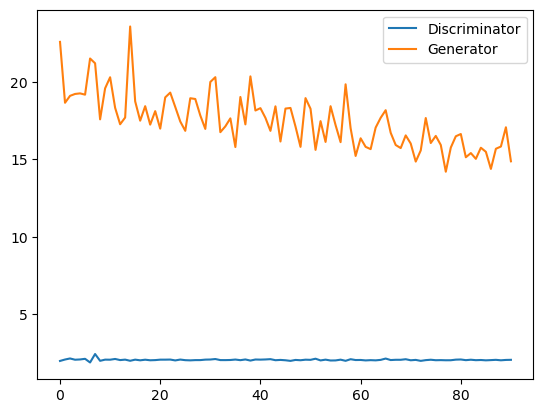

In [10]:
import numpy as np, pickle, matplotlib.pyplot as plt

with open('experiment_data/90_trainstats.pickle', 'rb') as f:
    train_stats = pickle.load(f)

train_stats['losses_d'] = np.array([i.detach().numpy() for i in train_stats['losses_d']])
train_stats['losses_g'] = np.array([i.detach().numpy() for i in train_stats['losses_g']])

plt.plot(train_stats['losses_d'], label='Discriminator')
plt.plot(train_stats['losses_g'], label='Generator')
plt.legend()
plt.show()